In [1]:
# Make imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Load the Data 
heart_disease=pd.read_csv("data/heart_disease.csv")
heart_disease.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# split data into features and labels
X=heart_disease.drop("output",axis=1)
y=heart_disease["output"]
X.shape,y.shape

((289, 13), (289,))

In [4]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# `In This Section we will`
* Clean Data
* Transform Data
* Reduce Data (To reduce1 overall cost if less data brings us same results)

In [5]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
# Feature and label split done 
X=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

In [7]:
# Three splits made 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [8]:
# Lets Try to make a model out of this data
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor()
# model.fit(X_train,y_train)
# model.score(X_test,y_test)

`The error above means ML Models can't work with categorical data like string to fix this lets convert our data to > Numerical Data `

In [9]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']

one_hot = OneHotEncoder()

transformer = ColumnTransformer(
    transformers=[
        ('one_hot', one_hot, categorical_features)
    ],
    remainder='passthrough'
)

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [11]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

# The other way to do the same is 

In [12]:
dummies=pd.get_dummies(car_sales[["Make","Colour"]])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,True
4,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,True,False,False,False,False
996,False,False,True,False,False,False,False,False,True
997,False,False,True,False,False,True,False,False,False
998,False,True,False,False,False,False,False,False,True


In [13]:
transformed_X.shape,y_train.shape

((1000, 13), (800,))

In [14]:
# Refit the model 
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2267726801247445

`Now lets handle Missing Data`

To handle Missing data way have two ways:
* Imputation (Filling missing values with some value)
* Removing the values 

In [15]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [16]:
# Find Missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

The Dataset above has a lot of missing data values so lets fix it now

In [17]:
car_sales_missing['Make'].fillna("missing",inplace=True)
car_sales_missing.isna().sum()

C:\Users\fairo\AppData\Local\Temp\ipykernel_16056\2415722170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing['Make'].fillna("missing",inplace=True)


Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
car_sales_missing["Colour"].fillna("missing",inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [21]:
np.round(car_sales_missing["Doors"].mean())

np.float64(4.0)

In [22]:
car_sales_missing["Doors"].fillna(4,inplace=True)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Drop those rows which have missing labels
car_sales_missing.dropna(inplace=True)

In [24]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
car_sales_missing.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0


In [26]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

Convert string or `object data` in features to the `Numerical data`

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer(
    transformers=[
        ("one_hot",one_hot,categorical_features)
    ],
    remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]], shape=(950, 13))

In [28]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)

In [29]:
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
model.score(X_test,y_test)

0.3432614018838924

# Filling Missing Values with Scikit-learn now

In [31]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
len(car_sales_missing)

1000

In [32]:
# First drop all those rows which have no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)
len(car_sales_missing)

950

car_sales_missing.isna().sum()

In [33]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [35]:
# Creating Imputers 
cat_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")
# Define data
cat_featuers=["Make","Colour"]
door_features=['Doors']
num_features=["Odometer (KM)"]
# Define Pipeline 
imputer= ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_featuers),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)

In [36]:
type(filled_X_train)

numpy.ndarray

In [37]:
filled_X_train

array([['Honda', 'Blue', 4.0, 40635.0],
       ['Honda', 'Blue', 4.0, 26616.0],
       ['Toyota', 'White', 4.0, 83594.0],
       ...,
       ['Honda', 'Blue', 4.0, 236760.0],
       ['BMW', 'White', 5.0, 194189.0],
       ['Honda', 'Blue', 4.0, 125819.0]], shape=(760, 4), dtype=object)

In [38]:
# Get our Transformed Data back into DatFrame
car_sales_filled_train=pd.DataFrame(filled_X_train,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled_test=pd.DataFrame(filled_X_test,columns=["Make","Colour","Doors","Odometer (KM)"])
type(car_sales_filled_test),type(car_sales_filled_train)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [39]:
# check data types now 
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [40]:
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [41]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer(
    transformers=[
        ("one_hot",one_hot,categorical_features)
    ],
    remainder="passthrough")
transformed_X_train=transformer.fit_transform(car_sales_filled_train)
transformed_X_test=transformer.transform(car_sales_filled_test)


In [43]:
# Model Creation 
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.15433310040486248

Whenever you need to Choose a model goto map provided by Sklearn https://scikit-learn.org/stable/machine_learning_map.html

In [44]:
# Lets work with house pricing 
boston=pd.read_csv("https://raw.githubusercontent.com/FairozAhmadSheikh/Datasets_CSV/refs/heads/main/Boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
boston_df=boston.rename(columns={"MEDV":"target"})
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [46]:
len(boston_df)

506

In [47]:
# go to sklearn documentation and choose a model that fits according to problem 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# Split in features and target 
X=boston_df.drop("target",axis=1)
y=boston_df["target"]
# Train test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Model 
model=Ridge()

# Train model 
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.7991878315708332

Above Model has accuracy near to 80% lets see if we can improve by selecting another model 

In [48]:
from sklearn.ensemble import RandomForestRegressor 
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8290656308022537

Moving up a bit so keep experimenting 

### Choosing Estimator for Classification now 

In [49]:
# Heart Disease dataset
heart_disease=pd.read_csv("data/heart_disease.csv").rename(columns={"output":"target"})
heart_disease.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [50]:
len(heart_disease)

289

In [51]:
from sklearn.svm import LinearSVC

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=LinearSVC()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7758620689655172

In [52]:
from sklearn.ensemble import RandomForestClassifier

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)
clf.score(X_test,y_test)



0.7413793103448276

In [53]:
# Two ways of prediction `predict` and `predict_proba` 
y_preds=clf.predict(X_test)
y_preds
y_preds_2=clf.predict_proba(X_test)
y_preds_2[:3]  # Gives probaility of classes i.e % how confident it is 

array([[0.01, 0.99],
       [0.22, 0.78],
       [0.47, 0.53]])

Same can be done  to solve `regresion problems`

In [54]:
from sklearn.ensemble import RandomForestRegressor
X=boston_df.drop("target",axis=1)
y=boston_df["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8680943877735202

In [55]:
y_preds=model.predict(X_test)
y_preds[:10]

array([12.755, 20.854, 48.34 , 20.938, 33.557, 43.971, 26.143, 22.629,
       20.884, 22.782])

In [56]:
np.array(y_test[:10])

array([10.2, 21.4, 50. , 21.7, 34.6, 43.5, 27.5, 22.3, 19.6, 22.2])

In [57]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds,y_test)

2.5700686274509796

# Lets Evaluate models using some metrics 

* Score method
* scoring parameter
* Problem Specific Metric 

In [60]:
from sklearn.ensemble import RandomForestClassifier

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
clf.score(X_test,y_test)

0.8103448275862069

In [63]:
from sklearn.svm import LinearSVC

clf2=LinearSVC()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8448275862068966

In [65]:
from sklearn.linear_model import SGDClassifier

clf3=SGDClassifier()
clf3.fit(X_train,y_train)
clf3.score(X_test,y_test)

0.41379310344827586

In [66]:
from sklearn.naive_bayes import GaussianNB

nbm=GaussianNB()
nbm.fit(X_train,y_train)
nbm.score(X_test,y_test)

0.8275862068965517

In [67]:
# Score method 
nbm.score(X_test,y_test)

0.8275862068965517

In [71]:
# scorring method 
from sklearn.model_selection import cross_val_score

score=cross_val_score(nbm,X,y,cv=5,scoring=None)

In [81]:
print(f'heart disease cross validated Accuracy : {np.mean(score)*100:.2f} % ')

heart disease cross validated Accuracy : 82.33 % 


# Area Under AUC ROC Curve 

In [90]:
# comparision of True Positive Rate vs False Positive Rate 
from sklearn.metrics import roc_curve
clf=RandomForestClassifier()

clf.fit(X_train,y_train)

y_probs=clf.predict_proba(X_test)

y_prob_positives = y_probs[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_prob_positives)

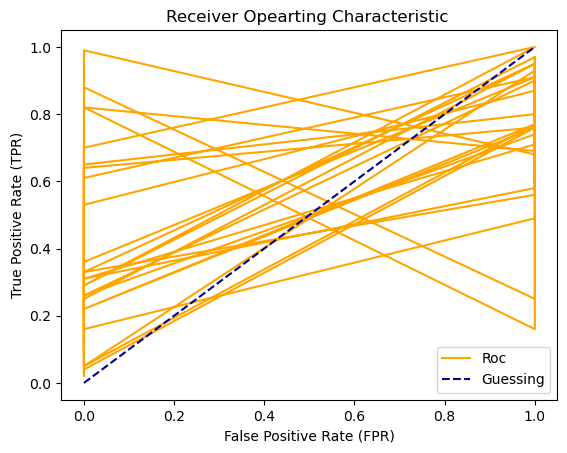

In [91]:
# Functionize 
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='Roc')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

    plt.title("Receiver Opearting Characteristic ")
    plt.legend()
    plt.show()

plot_roc_curve(y_test,y_prob_positives)

In [92]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_prob_positives)

0.8472049689440994

In [99]:
from sklearn.metrics import confusion_matrix

y_preds=clf3.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  0],
       [34,  1]])

In [100]:
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"],
                           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,0
1,34,1


<Axes: >

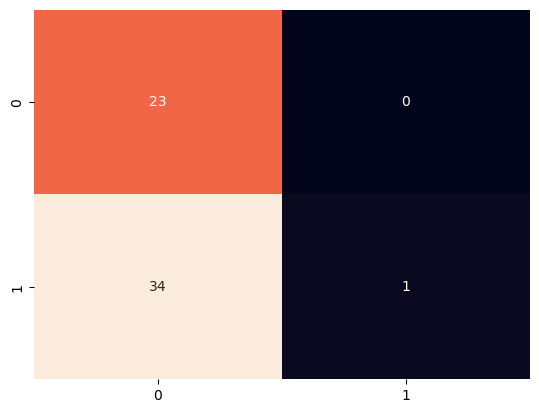

In [105]:
# Plotting Using HeatMaps
import seaborn as sns 
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat,annot=True,cbar=False)

In [112]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57        23
           1       1.00      0.03      0.06        35

    accuracy                           0.41        58
   macro avg       0.70      0.51      0.32        58
weighted avg       0.76      0.41      0.26        58



# Regression Model Evaluation Matrix 

In [114]:
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test) # Default is R^2

0.8654448653350507

In [116]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds=model.predict(X_test)

mae=mean_absolute_error(y_test,y_preds)

df=pd.DataFrame(data={"actual_value":y_test,
                     "predicted_value":y_preds})
df["difference"]=df["predicted_value"]-df["actual_value"]

In [117]:
df.head()

,actual_value,predicted_value,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793


In [118]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [120]:
np.square(df["difference"]).mean()

np.float64(9.867437068627442)

In [ ]:
# Scoring Parameter 
from sklearn.metrics import mean_squared_error
y_preds=